In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from pandas_datareader import wb
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_comp_names = pd.read_csv('sp500companies.csv', index_col=0)
df_comp_descr = pd.read_csv('snp500_companies_description.csv', index_col=0)
df_comp_descr = df_comp_descr[df_comp_descr['Dividend (annual)']!= '-'][['Market capitalization', 'Dividend (annual)']]
df_comp_descr.rename(columns={'Market capitalization': 'Market capitalization (B)'}, inplace=True)
df_comp_descr['Market capitalization (B)'] = df_comp_descr['Market capitalization (B)'].str.replace('B', '', regex=True).astype(float)
df_snp500 = pd.concat([df_comp_names, df_comp_descr], axis=1)
df_snp500.dropna(how='any', inplace=True)
df_snp500['Dividend (annual)'] = df_snp500['Dividend (annual)'].astype(float)
df_snp500.head()

,Name,Sector,Market capitalization (B),Dividend (annual)
MMM,3M,Industrials,79.78,5.96
AOS,A. O. Smith,Industrials,9.51,1.12
ABT,Abbott Laboratories,Health Care,195.87,1.88
ABBV,AbbVie,Health Care,263.34,5.64
ACN,Accenture,Information Technology,192.09,3.88


In [3]:
df_snp500.groupby('Sector').sum()

,Market capitalization (B),Dividend (annual)
Sector,,
Communication Services,711.58,12.30
Consumer Discretionary,1648.49,90.10
Consumer Staples,2535.38,73.61
Energy,1494.85,60.49
Financials,3226.43,155.76
Health Care,4171.28,88.49
Industrials,2509.69,157.16
Information Technology,8616.20,107.56
Materials,866.70,63.01


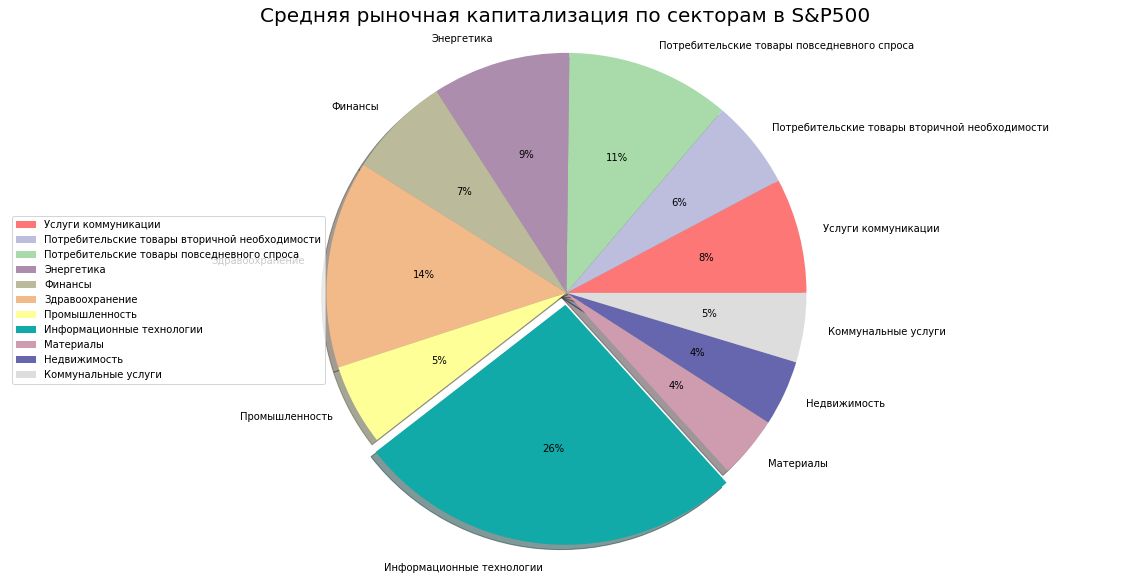

In [26]:
df_snp500_mean = df_snp500.groupby('Sector').mean()
colors = ['#FD7777',  '#BDBDDD', '#A9DBAA',
          '#AD8DAD', '#BBBA9A', '#F2BA88',
          '#FFFF98',  '#12AAA8', '#CF9CAF',
          '#6666AF', '#DDDDDD']

sectors = ['Услуги коммуникации', 'Потребительские товары вторичной необходимости', 'Потребительские товары повседневного спроса',
       'Энергетика', 'Финансы', 'Здравоохранение', 'Промышленность', 'Информационные технологии', 'Материалы', 'Недвижимость', 'Коммунальные услуги']


df_snp500_mean['Market capitalization (B)'].plot(
    kind='pie', 
    figsize=(20, 10),
    colors=colors,
    labels=sectors,
    shadow=True,
    explode=[0, 0, 0, 0, 0, 0, 0, 0.05, 0, 0, 0],
    autopct='%1.0f%%'
)
plt.ylabel('')
plt.legend(loc='center left')
plt.title('Средняя рыночная капитализация по секторам в S&P500', fontdict=dict(fontsize=20))
ax = plt.axis('equal')

count    10.000000
mean      7.100000
std       2.685351
min       3.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      12.000000
dtype: float64

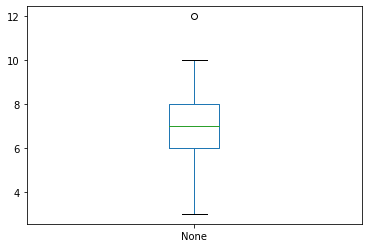

In [29]:
sample = pd.Series([3, 4, 6, 6, 6, 8, 8, 8, 10, 12])
sample.plot(
    kind='box'
)
sample.describe()

* Q1 - нижний квантиль
* Q3 - верхний квантиль
* min: Q1 - 1.5 * (Q3 - Q1)
* max: Q3 + 1.5 * (Q3 - Q1)
* Выброс - это то, что за пределами выборки

max = 8 + 1.5 * 2 = 11

In [30]:
countries = wb.get_countries()
df_lsp = wb.download(indicator="SP.DYN.LE00.IN", country=countries['iso2c'], start='1980', end='2019')
df_lsp.reset_index(inplace=True)
df_lsp.rename(columns={'SP.DYN.LE00.IN':'lifespan'}, inplace=True)
df_lsp = df_lsp.pivot(index='country', columns='year', values='lifespan')
df_lsp.dropna(how='all', axis=1, inplace=True)
df_lsp.dropna(how='all', axis=0, inplace=True)
df_lsp.dropna(how='any', axis=0, inplace=True)
df_lsp.head()

/home/tatyana/.local/lib/python3.6/site-packages/pandas_datareader/wb.py:593: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  "Non-standard ISO " "country codes: %s" % tmp, UserWarning


year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,...,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000
Africa Eastern and Southern,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,...,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213
Africa Western and Central,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,...,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723
Albania,70.208000,70.416000,70.635000,70.876000,71.134000,71.388000,71.605000,71.760000,71.843000,71.860000,...,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000,78.573000
Algeria,58.198000,59.519000,60.813000,62.029000,63.130000,64.087000,64.884000,65.545000,66.097000,66.554000,...,74.938000,75.199000,75.436000,75.661000,75.878000,76.090000,76.298000,76.499000,76.693000,76.880000


In [34]:
countries = countries[['name', 'region']].set_index('name')
countries.head()

,region
name,
Aruba,Latin America & Caribbean
Africa Eastern and Southern,Aggregates
Afghanistan,South Asia
Africa,Aggregates
Africa Western and Central,Aggregates


In [36]:
df_regions = pd.concat([df_lsp, countries], axis=1)
df_regions.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,region
Afghanistan,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,...,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,South Asia
Africa Eastern and Southern,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,...,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,Aggregates
Africa Western and Central,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,...,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,Aggregates
Albania,70.208000,70.416000,70.635000,70.876000,71.134000,71.388000,71.605000,71.760000,71.843000,71.860000,...,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000,78.573000,Europe & Central Asia
Algeria,58.198000,59.519000,60.813000,62.029000,63.130000,64.087000,64.884000,65.545000,66.097000,66.554000,...,75.199000,75.436000,75.661000,75.878000,76.090000,76.298000,76.499000,76.693000,76.880000,Middle East & North Africa


In [38]:
df_regions = df_regions.groupby('region').max()
df_regions.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
region,,,,,,,,,,,,,,,,,,,,,
Aggregates,73.752431,74.151642,74.498155,74.620262,74.725389,74.757188,75.056778,75.348206,75.535930,75.761883,...,80.746781,81.232825,81.227158,81.512329,81.942983,81.569229,81.954545,81.932316,82.049581,82.326183
East Asia & Pacific,76.091707,76.414390,76.922927,76.961463,77.365366,77.650488,78.064634,78.483659,78.399268,78.818049,...,82.978049,83.421951,83.480488,83.831707,83.980488,84.278049,84.226829,84.680488,84.934146,85.078049
Europe & Central Asia,76.846585,76.521463,77.037805,76.845610,77.576585,77.602439,77.990732,77.339024,77.226585,78.140976,...,82.246341,82.695122,82.917073,83.078049,83.229268,82.897561,83.602439,83.551220,83.753659,83.904878
Latin America & Caribbean,73.794000,74.004000,74.175000,74.315000,74.427000,74.511000,74.738000,75.006000,75.243000,75.456000,...,78.779000,78.986000,79.176000,79.349000,79.504000,79.646000,79.779000,79.914000,80.095000,80.279000
Middle East & North Africa,73.875610,74.260976,74.109756,74.458537,74.807317,75.207317,75.204195,75.644829,76.062659,76.445268,...,81.602439,81.656098,81.704878,82.056098,82.153659,82.051220,82.453659,82.551220,82.802439,82.858537


In [39]:
df_regions.drop('Aggregates', inplace=True)
df_regions.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,76.091707,76.414390,76.922927,76.961463,77.365366,77.650488,78.064634,78.483659,78.399268,78.818049,...,82.978049,83.421951,83.480488,83.831707,83.980488,84.278049,84.226829,84.680488,84.934146,85.078049
Europe & Central Asia,76.846585,76.521463,77.037805,76.845610,77.576585,77.602439,77.990732,77.339024,77.226585,78.140976,...,82.246341,82.695122,82.917073,83.078049,83.229268,82.897561,83.602439,83.551220,83.753659,83.904878
Latin America & Caribbean,73.794000,74.004000,74.175000,74.315000,74.427000,74.511000,74.738000,75.006000,75.243000,75.456000,...,78.779000,78.986000,79.176000,79.349000,79.504000,79.646000,79.779000,79.914000,80.095000,80.279000
Middle East & North Africa,73.875610,74.260976,74.109756,74.458537,74.807317,75.207317,75.204195,75.644829,76.062659,76.445268,...,81.602439,81.656098,81.704878,82.056098,82.153659,82.051220,82.453659,82.551220,82.802439,82.858537
North America,75.078049,75.463415,75.763415,76.065854,76.217073,76.368293,76.519512,76.719512,76.919512,77.119512,...,81.246341,81.448780,81.648780,81.748780,81.800000,81.900000,81.900000,81.900000,82.048780,82.048780


<AxesSubplot:>

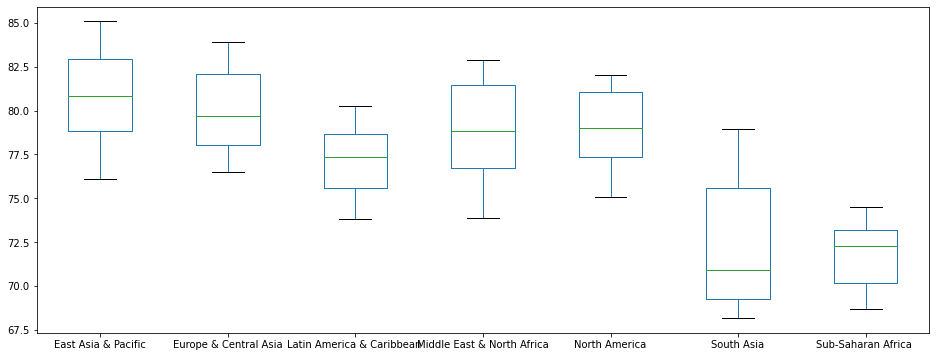

In [44]:
df_regions.T.plot(
    kind='box',
    figsize=(16, 6),
#     vert=False
)

In [48]:
df_eu_asia = df_regions.loc[['Europe & Central Asia']].T.reset_index()
df_eu_asia.rename(columns={'index': 'year'}, inplace=True)
df_eu_asia.head()

region,year,Europe & Central Asia
0,1980,76.846585
1,1981,76.521463
2,1982,77.037805
3,1983,76.845610
4,1984,77.576585


<AxesSubplot:xlabel='year', ylabel='Europe & Central Asia'>

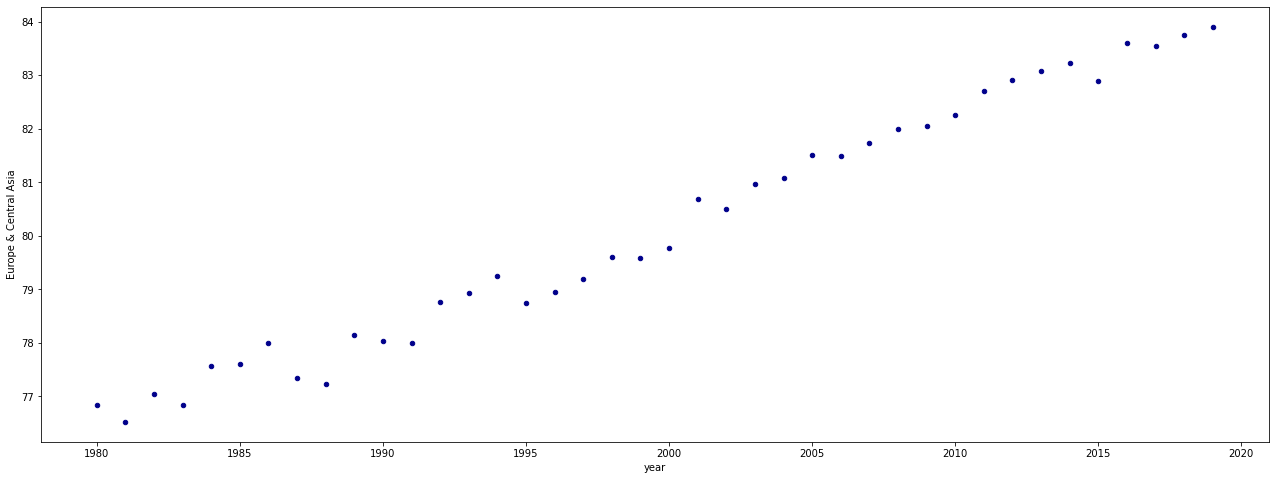

In [55]:
df_eu_asia.plot(
    kind='scatter',
    figsize=(22, 8),
    x='year',
    y='Europe & Central Asia',
    color='darkblue',
    
)

In [54]:
df_eu_asia['year'] = df_eu_asia['year'].astype(int)

Text(1998, 83, 'y = 0.2x -314.27')

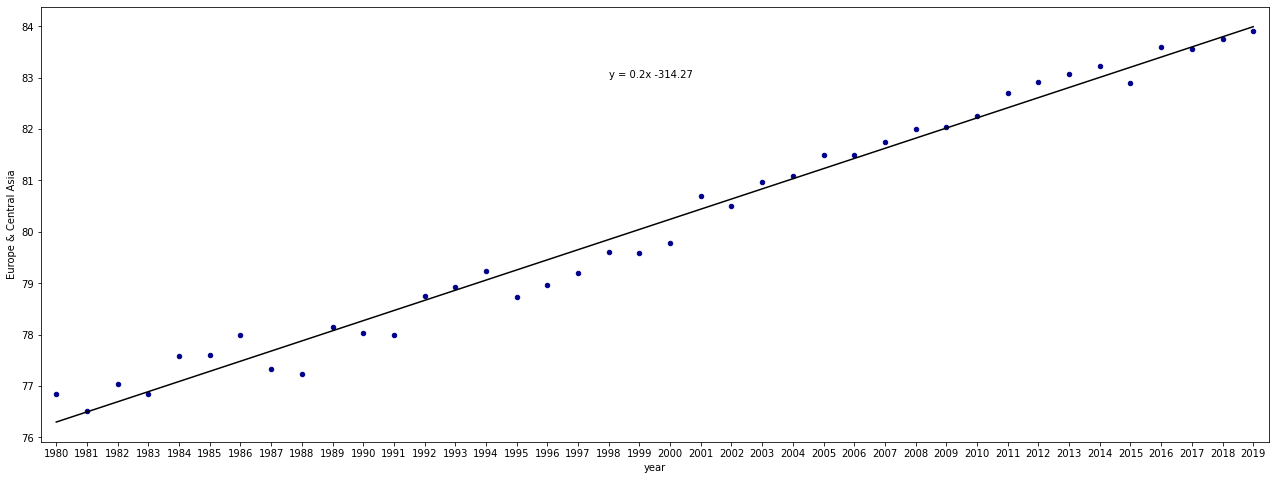

In [64]:
df_eu_asia.plot(
    kind='scatter',
    figsize=(22, 8),
    x='year',
    y='Europe & Central Asia',
    color='darkblue',
    xlim=(1979.5, 2019.5),
    xticks=df_eu_asia['year']
    
)

x = df_eu_asia['year']
y = df_eu_asia['Europe & Central Asia']
coef = np.polyfit(x, y, deg=1)
plt.plot(x, coef[0] * x + coef[1], color='black')

plt.annotate('y = {}x {}'.format(round(coef[0], 2), round(coef[1], 2)), 
            (1998, 83))

In [65]:
coef[0] * 2025 + coef[1]

85.17627012309532